The "Marketplace" company is launching an e-commerce marketplace where sellers offer items by posting a photo and description. Currently the categorization of the small number of products is done manually. The e-commerce site aims to expand and significantly increase the number of products, and manual categorization would be a long and unreliable step. To facilitate the posting of new articles and the search for products, it becomes necessary to automate this task. This categorization will be done from the descriptions and images of the products.

La mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

### **Text Analysis**

https://towardsdatascience.com/text-normalization-for-natural-language-processing-nlp-70a314bfa646

In [ ]:
# Data Structures
import numpy as np
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Corpus Processing
import nltk
nltk.download('stopwords')
import string
import re

from nltk.tokenize import word_tokenize
from nltk.tokenize import  RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk import SnowballStemmer,PorterStemmer


from sklearn.pipeline                 import make_pipeline
from sklearn.preprocessing            import Normalizer
from sklearn.preprocessing            import StandardScaler
from sklearn.preprocessing            import scale
from sklearn.preprocessing            import normalize



from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


from sklearn.decomposition            import TruncatedSVD
from sklearn.decomposition            import NMF
from sklearn.decomposition            import LatentDirichletAllocation
from sklearn.decomposition            import PCA


from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from sklearn.feature_extraction.text  import TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Download databases
flipkart= pd.read_csv('/content/drive/MyDrive/p6/flipkart_com-ecommerce_sample_1050.csv',sep=',')
data_con=flipkart.copy()

In [ ]:
data_con.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [ ]:
data_con.shape

(1050, 15)

In [ ]:
data_con.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

 ***We have some missing values!!***

---



### **Missing values and imputation**

In [ ]:
import missingno as msno

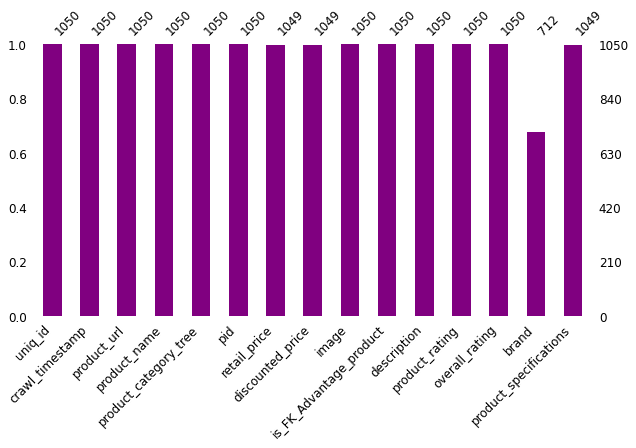

In [ ]:
msno.bar(data_con,  figsize=(10,5), fontsize=12, color="purple")

there is missing value for 'retail_price' , 'discounted_price' , 'brand' & 'product_specifications'

**Imputation**

In [ ]:
data_con['retail_price'].fillna((data_con['retail_price'].median()), inplace=True)
data_con['discounted_price'].fillna((data_con['discounted_price'].median()), inplace=True)

In [ ]:
data_con['brand'].fillna((data_con['brand'].mode()[0]), inplace=True)
data_con['product_specifications'].fillna((data_con['product_specifications'].mode()[0]), inplace=True)

In [ ]:
data_con.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

### **Data Exploration**

In [ ]:
data = data_con.filter(items=['image', 'product_name', 'product_category_tree', 'description'])

## **Cleaning dataset & visualisation**

### Product Name

In [ ]:
data['product_name'].unique()

array(['Elegance Polyester Multicolor Abstract Eyelet Door Curtain',
       'Sathiyas Cotton Bath Towel',
       'Eurospa Cotton Terry Face Towel Set', ...,
       'Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker',
       'Wallmantra Medium Vinyl Sticker Sticker',
       'Uberlyfe Large Vinyl Sticker'], dtype=object)

In [ ]:
data['product_category_tree'].sample(5)

996     ["Baby Care >> Baby Bath & Skin >> Baby Body W...
1014    ["Baby Care >> Infant Wear >> Baby Boys' Cloth...
633     ["Baby Care >> Infant Wear >> Baby Girls' Clot...
275     ["Baby Care >> Infant Wear >> Baby Boys' Cloth...
303     ["Home Decor & Festive Needs >> Showpieces >> ...
Name: product_category_tree, dtype: object

In [ ]:
data['description'].sample(5)

205    Buy Shoppingtara Elephant Pair Gift Showpiece ...
140    Rockmantra Fogg Tree Ceramic Mug (5.5 l)\r\n  ...
77     Giorgio Armani SMOOTH SILK LIP PENCIL 12 (Soye...
174    Buy Prithish Independence Day Design 9 Double ...
229    Buy Surface 180 Elephant Shape Handpainted Woo...
Name: description, dtype: object

**Cleaning 'product_category_tree' column**

In [ ]:
data['product_category_tree'][1]

'["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'

In [ ]:
data['category']=data['product_category_tree'].str.split(
    pat=">>",expand=True)[0]
data["category"] = data["category"].str.replace('[', "")
data["category"] = data["category"].str.replace('"', "")
data["category"] = data["category"].str.replace(' ', "")

catg  = {'HomeFurnishing':'Home',
         'HomeDecor&FestiveNeeds':'Decor',
         'Watches':'Watches',
         'BabyCare':'Baby',
         'BeautyandPersonalCare':'Beauty',
         'Computers':'Computers',
         'Kitchen&Dining':'Kitchen'}
data['category'] =[catg[i] for i in data['category']]
cluster  = {'Baby':0,
           'Decor':1,
           'Computers':2,
           'Watches':3,
           'Kitchen':4,
           'Home':5,
           'Beauty':6}

y_true = data['category'].map(cluster)

In [ ]:
data['category_1']=data['product_category_tree'].str.split(
    pat=">>",expand=True)[1]
data["category_1"] = data["category_1"].str.replace('[', "")
data["category_1"] = data["category_1"].str.replace('"', "")
data["category_1"] = data["category_1"].str.replace(' ', "")

In [ ]:
# for the error: "Transport endpoint is not connected"
"""!fusermount -u drive
!google-drive-ocamlfuse drive"""

'!fusermount -u drive\n!google-drive-ocamlfuse drive'

In [ ]:
data['category'].value_counts()

Decor        150
Computers    150
Beauty       150
Kitchen      150
Baby         150
Watches      150
Home         150
Name: category, dtype: int64

In [ ]:
data.describe(include='all').T

count unique  \
image                  1050   1050   
product_name           1050   1050   
product_category_tree  1050    642   
description            1050   1050   
category               1050      7   
category_1             1050     63   

                                                                     top freq  
image                               568f331e1039bf2e0635b899c2b3248f.jpg    1  
product_name                     Sonata 1141YM22 Analog Watch  - For Men    1  
product_category_tree  ["Home Furnishing >> Bed Linen >> Blankets, Qu...   56  
description            LukLuck Cotton Bath Towel (Bath Towel, Multico...    1  
category                                                           Decor  150  
category_1                                                  WristWatches  149

In [ ]:
data.drop('product_category_tree',inplace=True, axis=1)

In [ ]:
data.head()

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description category  \
0  Key Features of Elegance Polyester Multicolor ...     Home   
1  Specifications of Sathiyas Cotton Bath Towel (...     Baby   
2  Key Features of Eurospa Cotton Terry Face Towe...     Baby   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...     Home   
4  Key Features of Jaipur Print Cotton Floral Kin...     Home   

             category_1  
0  Curtains&Accessories  
1         BabyBath&Skin  
2         BabyBath&Skin  
3              BedLinen  
4              BedLinen

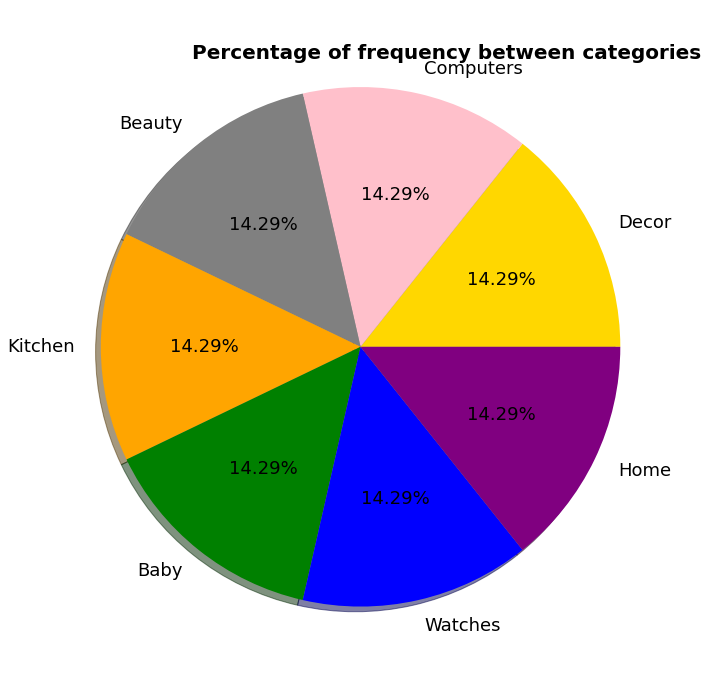

In [ ]:
values = data['category'].value_counts()
labels = data['category'].value_counts().index
colors = ['gold', 'pink', 'grey', 'orange', 'green', 'blue', 'purple']
explode = (0, 0, 0, 0, 0, 0, 0)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%.2f%%', shadow=True, textprops={'fontsize': 18})

ttl = plt.title( "Percentage of frequency between categories",  fontweight = 'bold' ,fontsize=20,pad=50)

ttl.set_position([0.65, 0.85])
plt.axis('equal')
plt.tight_layout()

In [ ]:
pd.set_option('display.max_row',62)
data['category_1'].value_counts().head(20)
#Nous avons 62 catégories 
#c'est plus détaille que les categories de la colonne cat_lvl1

WristWatches              149
LaptopAccessories          87
InfantWear                 84
CoffeeMugs                 74
Showpieces                 71
Fragrances                 65
BedLinen                   65
NetworkComponents          49
TableDecor&Handicrafts     27
Cookware                   27
CombosandKits              24
WallDecor&Clocks           22
BathLinen                  21
Curtains&Accessories       19
Makeup                     18
Baby&KidsGifts             15
BodyandSkinCare            15
BabyBedding                15
KitchenTools               14
BabyBath&Skin              14
Name: category_1, dtype: int64

### **Text Preprocessing**

* remove punctional
* keep only alphabetic characters
* remove stopwords and isolated letters
* put all words in lowercase
* lemmatization
* keep only the canonical forms of words



In [ ]:
data['description'].head()

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
Name: description, dtype: object

In [ ]:
data['description'].sample(5)

451    Key Features of Lushomes Plain Back Cushion Av...
140    Rockmantra Fogg Tree Ceramic Mug (5.5 l)\r\n  ...
442    Key Features of Rute Baby Girl's Sleepsuit Fab...
341    Buy Belkin Share Modem (N) Router only for Rs....
386    Flipkart.com: Buy French Factor Man of the Yea...
Name: description, dtype: object

In [ ]:
len(data['description'])

1050

**Function for the number of words**

In [ ]:
def word_size(base,columns):
  corpus=base[columns]

  words_dico=dict()
  import re
  #importation regular expressions

  expr = re.compile("\W+",re.U) # Regular expression of segmentation on spaces
  for text in corpus: # For each comment in the corpus
    text = str(text)
    text = expr.split(text)
    for word in set(text): # Retrieving each new word
      if word not in words_dico:
        words_dico[word]=1
      else: 
          # For each word already listed: add 1 if it is found
            words_dico[word]=words_dico[word]+1

  return len(words_dico)

In [ ]:
size=word_size(data,'description')
print(size)


7671



$\color{orange}{\text{1- Lower word}}$







In [ ]:
data["description_clean"] = data["description"].apply(lambda x: x.lower())
data["name_clean"] = data["product_name"].apply(lambda x: x.lower())

display(data.sample(5))

image  \
234  ed139e0d1b5c973495e1aa35dd4a5533.jpg   
135  fd369a1bb58ae02cd925dda7e9e1d00a.jpg   
79   320833ab08c9a94ef83520612899a85f.jpg   
183  3830dda3491cd5b28ed42ae544bc44f0.jpg   
96   f12a06b7dbfc55638afafcf8bb03d836.jpg   

                                     product_name  \
234                  JSM Hard Anodized Kadhai 4 L   
135  Prithish Working on my own Grass Ceramic Mug   
79              florence9 baby cap red checks Cap   
183   Rockmantra Blue Water Abstracts Ceramic Mug   
96   My Angel Gifts Show Piece Showpiece  -  5 cm   

                                           description category  \
234  Buy JSM Hard Anodized Kadhai 4 L for Rs.1071 o...  Kitchen   
135  Prithish Working on my own Grass Ceramic Mug (...  Kitchen   
79   Key Features of florence9 baby cap red checks ...     Baby   
183  Rockmantra Blue Water Abstracts Ceramic Mug (5...  Kitchen   
96   Buy My Angel Gifts Show Piece Showpiece  -  5 ...    Decor   

                 category_1  \
234                Cookware   
135              CoffeeMugs   
79               InfantWear   
183              CoffeeMugs   
96   TableDecor&Handicrafts   

                                     description_clean  \
234  buy jsm hard anodized kadhai 4 l for rs.1071 o...   
135  prithish working on my own grass ceramic mug (...   
79   key features of florence9 baby cap red checks ...   
183  rockmantra blue water abstracts ceramic mug (5...   
96   buy my angel gifts show piece showpiece  -  5 ...   

                                       name_clean  
234                  jsm hard anodized kadhai 4 l  
135  prithish working on my own grass ceramic mug  
79              florence9 baby cap red checks cap  
183   rockmantra blue water abstracts ceramic mug  
96   my angel gifts show piece showpiece  -  5 cm

$\color{orange}{\text{2- Contraction}}$


we will or we shouldnt've -> we should not have.

In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 7.7 MB/s 
     |████████████████████████████████| 321 kB 66.1 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85436 sha256=43c4e1ae959b055eb3c13b826a97c938df938dd427fa68cfbbb3c13172f4c192
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import contractions
data["description_clean"] = data["description_clean"].apply(lambda x: contractions.fix(x))
data["name_clean"] = data["name_clean"].apply(lambda x: contractions.fix(x))

display(data.sample(5))

image  \
252  6bc04b3ec1f8d4da2a00f8662f4fbed3.jpg   
60   4a1b23dacd7d2a9ec7414f7159f25a48.jpg   
357  79b78739b0ae84780001fec304ce036c.jpg   
127  13de17e59a92f8bcaec8bf103bbff8c1.jpg   
371  2a20862f02555a44b0ab301bed987a0b.jpg   

                                     product_name  \
252                         Metallino Kadhai NA L   
60      Mars Queen Eye Liner, Lip Gloss, EyeLiner   
357      Yardley Jasmine and Lace Satin Combo Set   
127  Go Bonjour Stainless Steel 9 pc Manicure Kit   
371         Netgear JWNR2010 N300 Wireless Router   

                                           description   category  \
252  Buy Metallino Kadhai NA L for Rs.721 online. M...    Kitchen   
60   Mars Queen Eye Liner, Lip Gloss, EyeLiner (Set...     Beauty   
357  Flipkart.com: Buy Yardley Jasmine and Lace Sat...     Beauty   
127  Flipkart.com: Buy Go Bonjour Stainless Steel 9...     Beauty   
371  Buy Netgear JWNR2010 N300 Wireless Router only...  Computers   

            category_1                                  description_clean  \
252           Cookware  buy metallino kadhai na l for rs.721 online. m...   
60       CombosandKits  mars queen eye liner, lip gloss, eyeliner (set...   
357         Fragrances  flipkart.com: buy yardley jasmine and lace sat...   
127    BodyandSkinCare  flipkart.com: buy go bonjour stainless steel 9...   
371  NetworkComponents  buy netgear jwnr2010 n300 wireless router only...   

                                       name_clean  
252                         metallino kadhai na l  
60      mars queen eye liner, lip gloss, eyeliner  
357      yardley jasmine and lace satin combo set  
127  go bonjour stainless steel 9 pc manicure kit  
371         netgear jwnr2010 n300 wireless router

$\color{orange}{\text{3- Punctual words}}$



* To add space after all punctual words

In [ ]:
oldstr=data['description_clean'][0]
re.sub(r'\.([a-zA-Z])', r'. \1', oldstr)
re.sub(r'\,([a-zA-Z])', r', \1', oldstr)

'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain, elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in your room so that yo

In [ ]:
def add_space(oldstr):
  oldstr=re.sub(r'\.([a-zA-Z])', r'. \1', oldstr) # Add space after . & ,
  oldstr=re.sub(r'\,([a-zA-Z])', r', \1', oldstr)
  return oldstr

In [ ]:
data["description_clean"] = data["description_clean"].apply(lambda x: add_space(x))

In [ ]:
data['description_clean'][0]

'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain, elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors. this curtain is made from 100% high quality polyester fabric. it features an eyelet style stitch with metal ring. it makes the room environment romantic and loving. this curtain is ant- wrinkle and anti shrinkage and have elegant apparance. give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in your room so th

Removing punctual words & numbers ...

In [ ]:

def remove_Noise(text):
    """
        Remove URLs from a sample string
    """
    text=text.translate(str.maketrans(' ', ' ', string.punctuation)) #remove ponctuation,
    text = text.rstrip('\n')              # Removes line breaks
    text=re.sub(r"https?://\S+|www\.\S+", "  ", text)
    #html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    #text=re.sub(html, "", text)
    text =re.sub(r'[^\x00-\x7f]',r' ', text) #Remove non-ASCII characters
    text=re.sub('\W_',' ', text)        # removes specials characters and leaves only words
    text = re.sub("\S*\d\S*","  ", text)   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
    text = re.sub("\S*@\S*\s?","  ", text) # removes emails and mentions (words with @)
    return text

In [ ]:
data["description_clean"] = data["description_clean"].apply(lambda x: remove_Noise(x))
data["name_clean"] = data["name_clean"].apply(lambda x: remove_Noise(x))

display(data.sample(5))

image  \
722  7091af252a785131c5a124fb90705fda.jpg   
10   920154acbe49d3202ed7d2ed2df1ea13.jpg   
114  bc784846bd59a16832454416ac708003.jpg   
6    f355cc1ccb08bd0d283ed979b7ee7515.jpg   
25   3c74db45cbfc14a78b8466dca494b3bb.jpg   

                                          product_name  \
722                     Sapatos Plain Single Duvet Red   
10   Calibro SW-125 Analog-Digital Watch  - For Men...   
114          Lollipop Lane Tiddly Wink Safari Bath Set   
6    Camerii WM64 Elegance Analog Watch  - For Men,...   
25   Alfajr WQ18 Qibla Compass Digital Watch  - For...   

                                           description category    category_1  \
722  Sapatos Plain Single Duvet Red (Single duvet)\...     Home      BedLinen   
10   Calibro SW-125 Analog-Digital Watch  - For Men...  Watches  WristWatches   
114  Flipkart.com is offering Lollipop Lane Tiddly ...     Baby  BabyGrooming   
6    Camerii WM64 Elegance Analog Watch  - For Men,...  Watches  WristWatches   
25   Alfajr WQ18 Qibla Compass Digital Watch  - For...  Watches  WristWatches   

                                     description_clean  \
722  sapatos plain single duvet red single duvet\r\...   
10   calibro    analogdigital watch   for men boys\...   
114  flipkart com is offering lollipop lane tiddly ...   
6    camerii    elegance analog watch   for men boy...   
25   alfajr    qibla compass digital watch   for me...   

                                            name_clean  
722                     sapatos plain single duvet red  
10       calibro    analogdigital watch   for men boys  
114          lollipop lane tiddly wink safari bath set  
6      camerii    elegance analog watch   for men boys  
25   alfajr    qibla compass digital watch   for me...

In [ ]:
#test
idex=0
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_clean'][idex]
print('#text modifier#  :',text_modifier)

#text originale#: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

In [ ]:
#test
idex=450
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_clean'][idex]
print('#text modifier#  :',text_modifier)

#text originale#: Specifications of Upside Down Sleeveless Applique Baby Girl's, Baby Boy's Jacket General Details Ideal For Baby Girl's, Baby Boy's Pattern Applique Jacket Details Fabric Poly Cotton Reversible No Hooded No Closure Buttons Sleeve Sleeveless Lining Cotton Fabric Care Dont Wash With Other Garments, Hand Wash With Mild Detergent,Dont Tumble Dry, Dry In Shade. Additional Details Style Code LIGHT PINK SMILEY FACE JACKET Other Details Sleeveless In the Box 1 Jacket
#text modifier#  : specifications of upside down sleeveless applique baby girls baby boys jacket general details ideal for baby girls baby boys pattern applique jacket details fabric poly cotton reversible no hooded no closure buttons sleeve sleeveless lining cotton fabric care do not wash with other garments hand wash with mild detergent do not tumble dry dry in shade additional details style code light pink smiley face jacket other details sleeveless in the box    jacket


$\color{orange}{\text{4- Tokenize}}$


Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.


1.   Character tokens: s-m-a-r-t-e-r
2.   Subword tokens: smart-er
3.   Word tokenization:  Never-give-up

https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/

https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

In [ ]:
def tokenization(text):
  nltk_tokens = nltk.word_tokenize(text)
  return nltk_tokens

"""  ordered_tokens = set()
  result = []
  for word in nltk_tokens:
      if word not in ordered_tokens:
          ordered_tokens.add(word)
          result.append(word)
  return " ".join(result) # Return the text untokenize"""

'  ordered_tokens = set()\n  result = []\n  for word in nltk_tokens:\n      if word not in ordered_tokens:\n          ordered_tokens.add(word)\n          result.append(word)\n  return " ".join(result) # Return the text untokenize'

In [ ]:
# Tokenizing  texts.
from nltk.tokenize import word_tokenize
nltk.download('punkt')

data['description_tokenized'] = data["description_clean"].apply(lambda x: tokenization(x))
data['name_tokenized'] = data["name_clean"].apply(lambda x: tokenization(x))

display(data.sample(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


image  \
914  762b6b22cccf91935e92446efe298fe3.jpg   
798  9993de7e2bcced43dc9edb3b2c81f23d.jpg   
643  86a39f77de21aa9654e8ea03335244fc.jpg   
900  d3f4a4336324a3d180de23df1e75b9b7.jpg   
406  fa6f5eb34be4ad5daec225bfe09f2414.jpg   

                                          product_name  \
914       612 League Baby Boy's Checkered Casual Shirt   
798  Oxyglow Golden Glow Radiance Anti Acne Facial ...   
643              Intel 3.2 GHz LGA 1150 3250 Processor   
900  Loreal Diarichesse No- 5 Light Brown ( Pack of...   
406                             Yardley Gold Combo Set   

                                           description   category  \
914  Specifications of 612 League Baby Boy's Checke...       Baby   
798  Buy Oxyglow Golden Glow Radiance Anti Acne Fac...     Beauty   
643  Specifications of Intel 3.2 GHz LGA 1150 3250 ...  Computers   
900  Key Features of Loreal Diarichesse No- 5 Light...     Beauty   
406  Flipkart.com: Buy Yardley Gold Combo Set onlin...     Beauty   

             category_1                                  description_clean  \
914          InfantWear  specifications of    league baby boys checkere...   
798       CombosandKits  buy oxyglow golden glow radiance anti acne fac...   
643  ComputerComponents  specifications of intel    ghz lga       proce...   
900            HairCare  key features of loreal diarichesse no    light...   
406          Fragrances  flipkart com buy yardley gold combo set online...   

                                            name_clean  \
914            league baby boys checkered casual shirt   
798  oxyglow golden glow radiance anti acne facial ...   
643                   intel    ghz lga       processor   
900  loreal diarichesse no    light brown  pack of ...   
406                             yardley gold combo set   

                                 description_tokenized  \
914  [specifications, of, league, baby, boys, check...   
798  [buy, oxyglow, golden, glow, radiance, anti, a...   
643  [specifications, of, intel, ghz, lga, processo...   
900  [key, features, of, loreal, diarichesse, no, l...   
406  [flipkart, com, buy, yardley, gold, combo, set...   

                                        name_tokenized  
914     [league, baby, boys, checkered, casual, shirt]  
798  [oxyglow, golden, glow, radiance, anti, acne, ...  
643                       [intel, ghz, lga, processor]  
900  [loreal, diarichesse, no, light, brown, pack, ...  
406                        [yardley, gold, combo, set]

In [ ]:
#test
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_clean'][idex]
print('#text modifier#  :',text_modifier)
text_tokenized=data['description_tokenized'][idex]
print('#text tokenized#  :',text_tokenized)

#text originale#: Specifications of Upside Down Sleeveless Applique Baby Girl's, Baby Boy's Jacket General Details Ideal For Baby Girl's, Baby Boy's Pattern Applique Jacket Details Fabric Poly Cotton Reversible No Hooded No Closure Buttons Sleeve Sleeveless Lining Cotton Fabric Care Dont Wash With Other Garments, Hand Wash With Mild Detergent,Dont Tumble Dry, Dry In Shade. Additional Details Style Code LIGHT PINK SMILEY FACE JACKET Other Details Sleeveless In the Box 1 Jacket
#text modifier#  : specifications of upside down sleeveless applique baby girls baby boys jacket general details ideal for baby girls baby boys pattern applique jacket details fabric poly cotton reversible no hooded no closure buttons sleeve sleeveless lining cotton fabric care do not wash with other garments hand wash with mild detergent do not tumble dry dry in shade additional details style code light pink smiley face jacket other details sleeveless in the box    jacket
#text tokenized#  : ['specifications', 'o

In [ ]:
size_filtre3=word_size(data,'description_tokenized')
print(size_filtre3)

5058


$\color{orange}{\text{5- Stop words}}$

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopword=nltk.corpus.stopwords.words('english')

In [ ]:
def remove_sw(text):
  text=[word for word in text if word not in stopword]
  return text

In [ ]:
data['description_stopword']=data['description_tokenized'].apply(lambda x : remove_sw(x))
data['name_stopword'] = data['name_tokenized'].apply(lambda x: remove_sw(x))
display(data.sample(3))

image  \
430  a54b94096938252901d3f7f8de97bffb.jpg   
917  27175ea71cc5f2879882c77b9931cf8b.jpg   
371  2a20862f02555a44b0ab301bed987a0b.jpg   

                              product_name  \
430                       ocean VGLASS0051   
917  Megaway 196.85 inch White Rice Lights   
371  Netgear JWNR2010 N300 Wireless Router   

                                           description   category  \
430  Key Features of ocean VGLASS0051 pack of 6,oce...    Kitchen   
917  Megaway 196.85 inch White Rice Lights (Pack of...      Decor   
371  Buy Netgear JWNR2010 N300 Wireless Router only...  Computers   

                   category_1  \
430             Bar&Glassware   
917  DecorativeLighting&Lamps   
371         NetworkComponents   

                                     description_clean  \
430  key features of ocean    pack of    ocean     ...   
917  megaway    inch white rice lights pack of   \r...   
371  buy netgear       wireless router only for rs ...   

                            name_clean  \
430                           ocean      
917  megaway    inch white rice lights   
371      netgear       wireless router   

                                 description_tokenized  \
430  [key, features, of, ocean, pack, of, ocean, ml...   
917  [megaway, inch, white, rice, lights, pack, of,...   
371  [buy, netgear, wireless, router, only, for, rs...   

                           name_tokenized  \
430                               [ocean]   
917  [megaway, inch, white, rice, lights]   
371           [netgear, wireless, router]   

                                  description_stopword  \
430  [key, features, ocean, pack, ocean, ml, clear,...   
917  [megaway, inch, white, rice, lights, pack, pri...   
371  [buy, netgear, wireless, router, rs, flipkart,...   

                            name_stopword  
430                               [ocean]  
917  [megaway, inch, white, rice, lights]  
371           [netgear, wireless, router]

In [ ]:
#test
idex=0
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_stopword'][idex]
print('#text without stopwords#  :',text_modifier)

#text originale#: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

In [ ]:
size_filtre4=word_size(data,'description_stopword')
print(size_filtre4)

4944


### **Reducing the words**
* Stemming
* Lemmatization

$\color{orange}{\text{6- Lemmatization}}$

The real difference between stemming and lemmatization is that Stemming reduces word-forms to (pseudo)stems which might be meaningful or meaningless, whereas lemmatization reduces the word-forms to linguistically valid meaning.

In [ ]:
"""from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

def keep_text(text):

    lemmatizer = WordNetLemmatizer()

    tokens_tagged = nltk.pos_tag(nltk.word_tokenize(text))  # tokenize the text then return a list of tuple (token, nltk_tag)
    lemmatized_text = []
    for word, tag in tokens_tagged:
        if tag.startswith('JJ'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'a')) # Lemmatisze adjectives. Not doing anything since we remove all adjective
        elif tag.startswith('V'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'v')) # Lemmatisze verbs
        elif tag.startswith('N'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'n')) # Lemmatisze nouns
        elif tag.startswith('R'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'r')) # Lemmatisze adverbs
        else:
            lemmatized_text.append(lemmatizer.lemmatize(word)) # If no tags has been found, perform a non specific lemmatization
    return " ".join(lemmatized_text) # Return the text untokenize"""

'from nltk.stem.wordnet import WordNetLemmatizer\nnltk.download(\'averaged_perceptron_tagger\')\n\ndef keep_text(text):\n\n    lemmatizer = WordNetLemmatizer()\n\n    tokens_tagged = nltk.pos_tag(nltk.word_tokenize(text))  # tokenize the text then return a list of tuple (token, nltk_tag)\n    lemmatized_text = []\n    for word, tag in tokens_tagged:\n        if tag.startswith(\'JJ\'):\n            lemmatized_text.append(lemmatizer.lemmatize(word,\'a\')) # Lemmatisze adjectives. Not doing anything since we remove all adjective\n        elif tag.startswith(\'V\'):\n            lemmatized_text.append(lemmatizer.lemmatize(word,\'v\')) # Lemmatisze verbs\n        elif tag.startswith(\'N\'):\n            lemmatized_text.append(lemmatizer.lemmatize(word,\'n\')) # Lemmatisze nouns\n        elif tag.startswith(\'R\'):\n            lemmatized_text.append(lemmatizer.lemmatize(word,\'r\')) # Lemmatisze adverbs\n        else:\n            lemmatized_text.append(lemmatizer.lemmatize(word)) # If no t

In [ ]:
"""nltk.download('wordnet')
data["description_lemm"] = data["description_stopword"].apply(lambda x: keep_text(x))
data["name_lemm"] = data["name_stopword"].apply(lambda x: keep_text(x))

display(data.sample(5))
#test
text=data.description_stopword[idex]
print('#text originale#:',text)
text_modifier=data['description_lemm'][idex]
print('#text modifier#  :',text_modifier)"""

'nltk.download(\'wordnet\')\ndata["description_lemm"] = data["description_stopword"].apply(lambda x: keep_text(x))\ndata["name_lemm"] = data["name_stopword"].apply(lambda x: keep_text(x))\n\ndisplay(data.sample(5))\n#test\ntext=data.description_stopword[idex]\nprint(\'#text originale#:\',text)\ntext_modifier=data[\'description_lemm\'][idex]\nprint(\'#text modifier#  :\',text_modifier)'

In [ ]:
import nltk
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data['description_lemma']=data['description_stopword'].apply(lambda x : lemmatize_text(x))
data['name_lemma']=data['name_stopword'].apply(lambda x : lemmatize_text(x))

In [ ]:
#test
idex=0
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_lemma'][idex]
print('#text stem#  :',text_modifier)

#text originale#: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

In [ ]:
#test
idex=0
text=data.product_name[idex]
print('#text originale#:',text)
text_modifier=data['name_lemma'][idex]
print('#text stem#  :',text_modifier)

#text originale#: Elegance Polyester Multicolor Abstract Eyelet Door Curtain
#text stem#  : ['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain']


In [ ]:
word_size(data,'description_lemma')

4531

$\color{orange}{\text{7- short words}}$

Deleting the words which has just one letter

In [ ]:
def rem_short_words(words_list, char_len = 2):
    word_len = [len(i) for i in words_list]
    index_keep = np.array(word_len) > char_len
    words_list_red = np.array(words_list)[index_keep]
    return(list(words_list_red))

In [ ]:
data['description_lemma_short']=data['description_lemma'].apply(rem_short_words)
data['name_lemma_short']=data['name_lemma'].apply(rem_short_words)

In [ ]:
word_size(data,'description_lemma_short')

4449

In [ ]:
#test
idex=0
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_lemma_short'][idex]
print('#text stem#  :',text_modifier)

#text originale#: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

### **Frequency calculation**

Term frequency answers the question of, how many times does this word appear in this document, how important is this word to this specific document.

The re. compile() method:

With this method we can combine a regular expression pattern into pattern objects, which can be used for pattern matching. It also helps to search a pattern again without rewriting it

In [ ]:
# http://pymotw.com/2/re/

import re
#import the regular expressions

corpus=data['description_lemma_short']
words_dico=dict()

expr =re.compile("\W+",re.U) #  method is used to compile a regular expression pattern provided as a string into a regex pattern object (re.Pattern)
for text in corpus:           # re.U. Interprets letters according to the Unicode character set. This flag affects the behavior of \w, \W, \b, \B. 6.
  text = str(text)
  text = expr.split(text)
  for word in set(text): 
    if word not in words_dico:
      words_dico[word]=1
    else: 
          words_dico[word]=words_dico[word]+1



In [ ]:
len(words_dico)

4449

**Frequency exploration**

In [ ]:
df_word_freq=pd.DataFrame({'words':words_dico.keys(),'Frequency':words_dico.values()})

In [ ]:
df_word_freq.sort_values(ascending=False,by='Frequency')

words  Frequency
0                      1050
131      product        664
210         free        594
211          buy        576
218     delivery        566
...          ...        ...
2753       bezel          1
2754       olvin          1
2756   hourglass          1
984         knit          1
2224  projection          1

[4449 rows x 2 columns]

**Droping all the space**

In [ ]:
df_word_freq.drop([0],inplace=True, axis=0)

In [ ]:
df_word_freq.sort_values(ascending=False,by='Frequency')

words  Frequency
131      product        664
210         free        594
211          buy        576
218     delivery        566
221         cash        564
...          ...        ...
2405      origin          1
2408  upholstery          1
2409   clearance          1
2412    homeedge          1
2225       throw          1

[4448 rows x 2 columns]

Text(0.5, 1.0, 'Frequency of words')

<Figure size 1440x720 with 0 Axes>

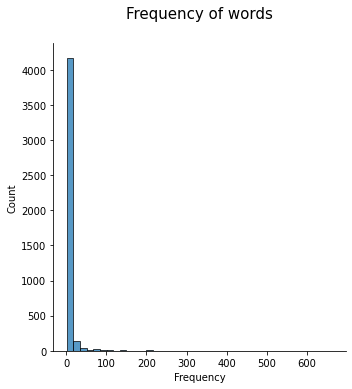

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(data=df_word_freq,bins=40, x="Frequency");
plt.title('Frequency of words', fontsize = 15, pad = 25)

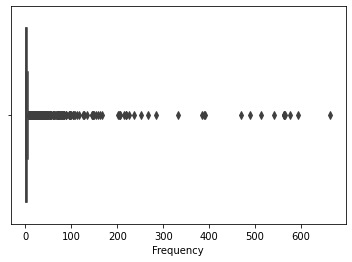

In [ ]:
sns.boxplot(data=df_word_freq,x='Frequency');

In [ ]:
df_word_freq['Frequency'].describe()

count    4448.000000
mean        7.390737
std        34.434174
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       664.000000
Name: Frequency, dtype: float64

In [ ]:
sorted_freq=df_word_freq.sort_values(by='Frequency',ascending=False)

In [ ]:
df1=sorted_freq[0:40]

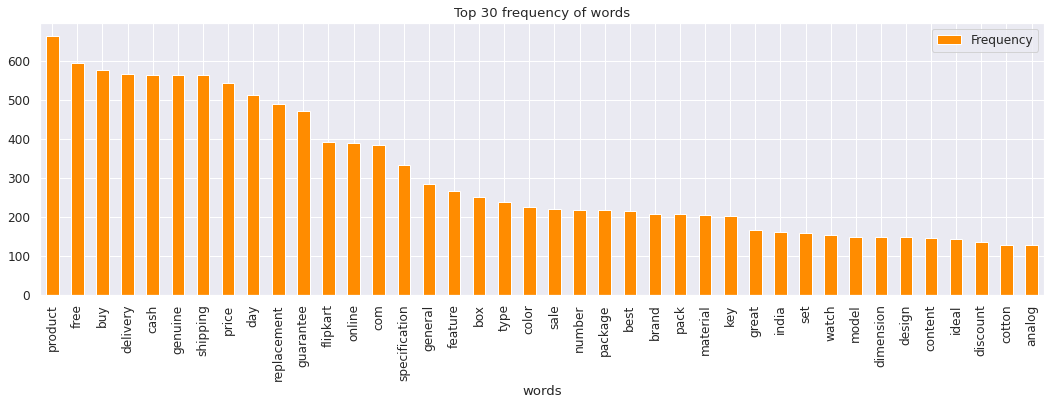

In [ ]:

sns.set(font_scale=1.1)
df1.plot(kind='bar',x='words',y='Frequency',title='Top 30 frequency of words',figsize=(18,5) ,color="darkorange")

In [ ]:
df2=sorted_freq[-41:-1]

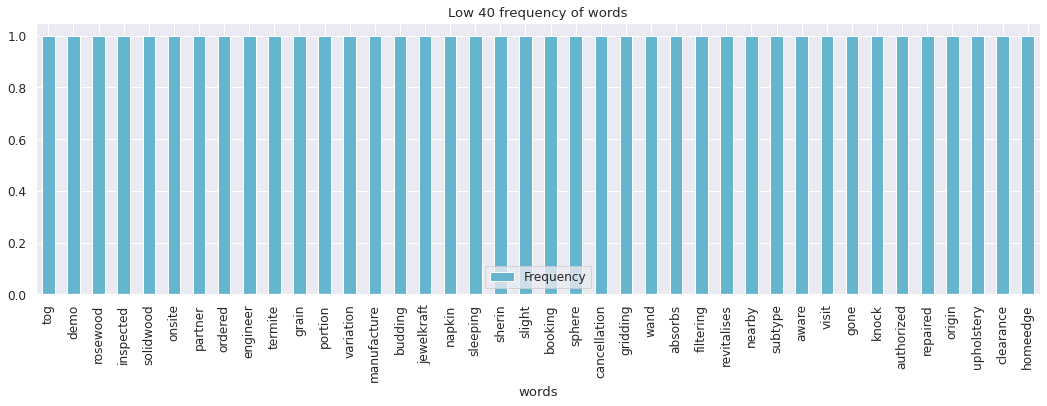

In [ ]:
df2.plot(kind='bar',x='words',y='Frequency', color="c",figsize=(18,5),title='Low 40 frequency of words')

In [ ]:
len(sorted_freq)

4448

### **word cloud**

Word clouds are fun to use as a visual aid with blog posts to underscore the keywords on which you're focusing.

https://medium.com/@harinisureshla/wordclouds-basics-of-nlp-5b60be226414

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
data['category'].unique()

array(['Home', 'Baby', 'Watches', 'Decor', 'Kitchen', 'Beauty',
       'Computers'], dtype=object)

In [ ]:
df_home= data.loc[data['category']== 'Home']

In [ ]:
df_home.head(2)

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   

                                         description category  \
0  Key Features of Elegance Polyester Multicolor ...     Home   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...     Home   

             category_1                                  description_clean  \
0  Curtains&Accessories  key features of elegance polyester multicolor ...   
3              BedLinen  key features of santosh royal fashion cotton p...   

                                          name_clean  \
0  elegance polyester multicolor abstract eyelet ...   
3  santosh royal fashion cotton printed king size...   

                               description_tokenized  \
0  [key, features, of, elegance, polyester, multi...   
3  [key, features, of, santosh, royal, fashion, c...   

                                      name_tokenized  \
0  [elegance, polyester, multicolor, abstract, ey...   
3  [santosh, royal, fashion, cotton, printed, kin...   

                                description_stopword  \
0  [key, features, elegance, polyester, multicolo...   
3  [key, features, santosh, royal, fashion, cotto...   

                                       name_stopword  \
0  [elegance, polyester, multicolor, abstract, ey...   
3  [santosh, royal, fashion, cotton, printed, kin...   

                                   description_lemma  \
0  [key, feature, elegance, polyester, multicolor...   
3  [key, feature, santosh, royal, fashion, cotton...   

                                          name_lemma  \
0  [elegance, polyester, multicolor, abstract, ey...   
3  [santosh, royal, fashion, cotton, printed, kin...   

                             description_lemma_short  \
0  [key, feature, elegance, polyester, multicolor...   
3  [key, feature, santosh, royal, fashion, cotton...   

                                    name_lemma_short  
0  [elegance, polyester, multicolor, abstract, ey...  
3  [santosh, royal, fashion, cotton, printed, kin...

In [ ]:
df_home['category_1'].unique()

array(['Curtains&Accessories', 'BedLinen', 'LivingRoomFurnishing',
       'BathLinen', 'JMDHomeFurnishing', "Kripa'sHomeFurnishing",
       'Kitchen&DiningLinen', 'Cushions,Pillows&Covers', 'Living',
       'TidyHomeFurnishing', 'Living]', 'FloorCoverings'], dtype=object)

In [ ]:
comment_words_1 = '' 
stopwords = set(STOPWORDS)

for val in df_home['category_1']: 
      
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_1 += " ".join(tokens)+" "

wordcloud_1 = WordCloud(width = 2000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words_1)

Text(0.5, 1.0, 'Home Furnishing Categories')

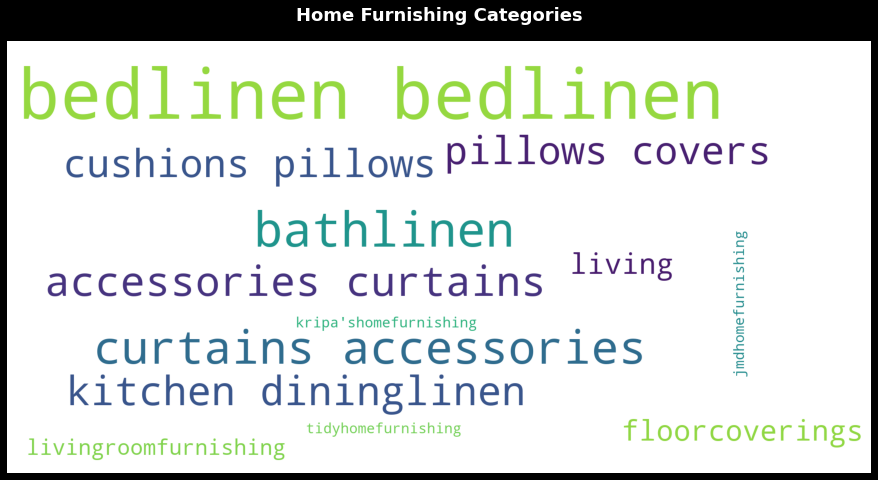

In [ ]:
plt.figure(figsize = (12, 6), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Home Furnishing Categories", size=18, color='white',fontweight="bold", pad=20)

In [ ]:
df_Baby= data.loc[data['category']== 'Baby']

In [ ]:
df_Baby['category_1'].unique()

array(['BabyBath&Skin', 'InfantWear', 'Feeding&Nursing', 'BabyBedding',
       'Furniture&Furnishings', 'BabyGrooming', 'Diapering&PottyTraining',
       'Strollers&ActivityGear', 'Baby&KidsGifts'], dtype=object)

In [ ]:
comment_words_2 = '' 
stopwords = set(STOPWORDS)

for val in df_Baby['category_1']:  
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_2 += " ".join(tokens)+" "

wordcloud_2 = WordCloud(width = 2000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words_2)

Text(0.5, 1.0, 'BabyCare Categories')

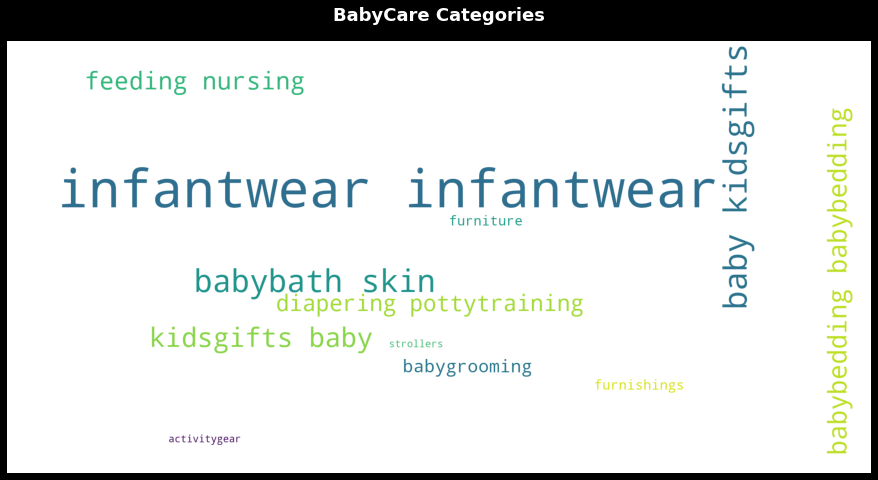

In [ ]:
plt.figure(figsize = (12, 6), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("BabyCare Categories", size=18, color='white',fontweight="bold", pad=20)

In [ ]:
df_Watches= data.loc[data['category']== 'Watches']

In [ ]:
df_Watches['category_1'].unique()

array(['WristWatches', 'Clocks'], dtype=object)

In [ ]:
comment_words_3 = '' 
stopwords = set(STOPWORDS)

for val in df_Watches['category_1']:   
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_3 += " ".join(tokens)+" "

wordcloud_3 = WordCloud(width = 2000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words_3)

Text(0.5, 1.0, 'Watches Categories')

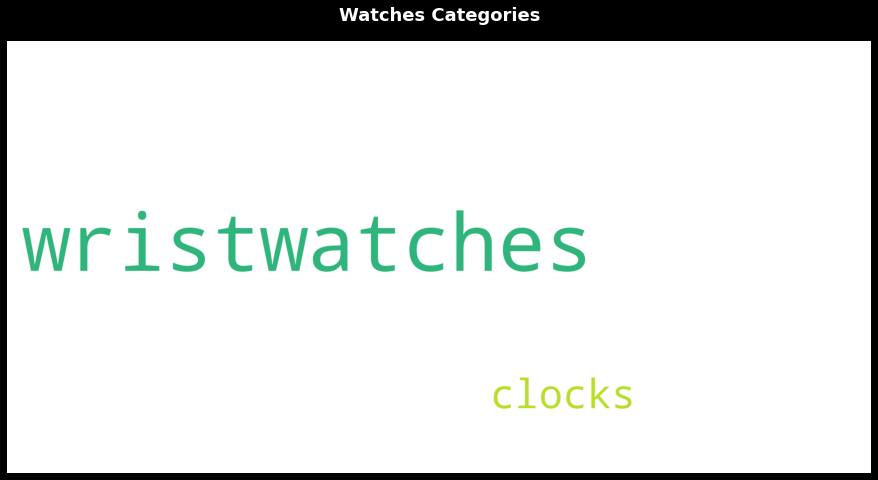

In [ ]:
plt.figure(figsize = (12, 6), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_3) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Watches Categories", size=18, color='white',fontweight="bold", pad=20)

In [ ]:
df_Decor= data.loc[data['category']== 'Decor']

In [ ]:
df_Decor['category_1'].unique()

array(['Candles&Fragrances', 'WallDecor&Clocks', 'TableDecor&Handicrafts',
       'Flowers,Plants&Vases', 'Showpieces', 'DecorativeLighting&Lamps',
       'TRUEHomeDecor&FestiveNeeds]', 'Showpiece', 'Garden&Leisure',
       'Religion&Devotion'], dtype=object)

In [ ]:
comment_words_4 = '' 
stopwords = set(STOPWORDS)

for val in df_Decor['category_1']:   
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_4 += " ".join(tokens)+" "

wordcloud_4 = WordCloud(width = 2000, height = 1000,  background_color ='white', 
                stopwords = stopwords,  min_font_size = 10).generate(comment_words_4)

Text(0.5, 1.0, 'HomeDecor Categories')

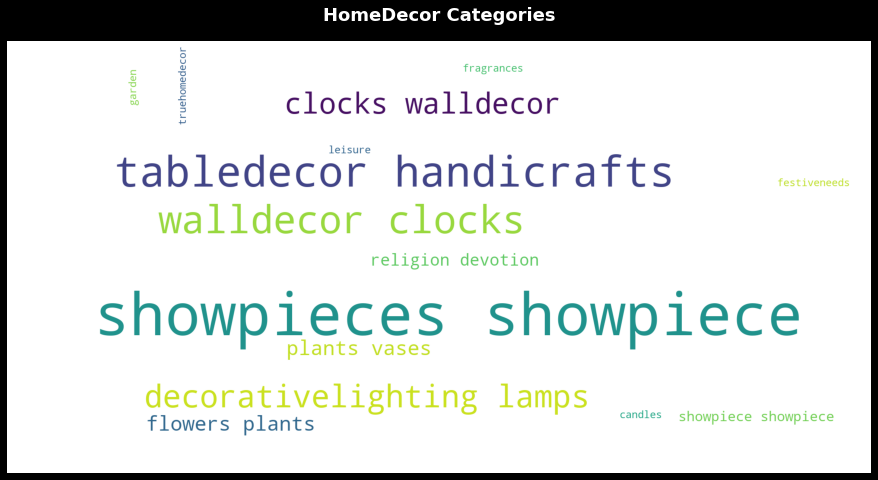

In [ ]:
plt.figure(figsize = (12, 6), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_4) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("HomeDecor Categories", size=18, color='white',fontweight="bold", pad=20)

In [ ]:
df_Kitchen= data.loc[data['category']== 'Kitchen']

In [ ]:
df_Kitchen['category_1'].unique()

array(['Tableware&Cutlery', 'Lighting', 'CoffeeMugs', 'Cookware',
       'Containers&Bottles', 'Consumables&Disposables', 'KitchenTools',
       'Bar&Glassware', 'PressureCookers&Pans', 'Housekeeping&Laundry',
       'Dinnerware&Crockery'], dtype=object)

In [ ]:
comment_words_5 = '' 
for val in df_Kitchen['category_1']: 
      
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words_5 += " ".join(tokens)+" "

wordcloud_5 = WordCloud(width = 2000, height = 1000,  background_color ='white', 
                stopwords = stopwords,  min_font_size = 10).generate(comment_words_5)

Text(0.5, 1.0, 'Kitchen & Dining Categories')

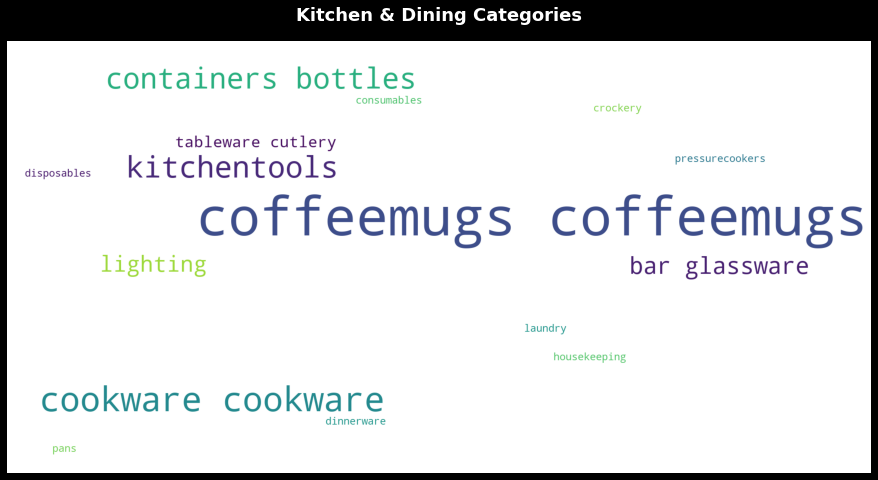

In [ ]:
plt.figure(figsize = (12, 6), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_5) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Kitchen & Dining Categories", size=18, color='white',fontweight="bold", pad=20)

In [ ]:
df_Beauty= data.loc[data['category']== 'Beauty']

In [ ]:
df_Beauty['category_1'].unique()

array(['HairCare', 'Makeup', 'CombosandKits', 'HealthCare',
       'BodyandSkinCare', 'Fragrances', "Women'sHygiene", 'BathandSpa',
       'EyeCare', "Men'sGrooming", 'BeautyAccessories'], dtype=object)

In [ ]:
comment_words_6 = '' 

for val in df_Beauty['category_1']:   
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_6 += " ".join(tokens)+" "

wordcloud_6 = WordCloud(width = 2000, height = 1000, background_color ='white', 
                stopwords = stopwords, min_font_size = 10).generate(comment_words_6)

Text(0.5, 1.0, 'Beauty Categories')

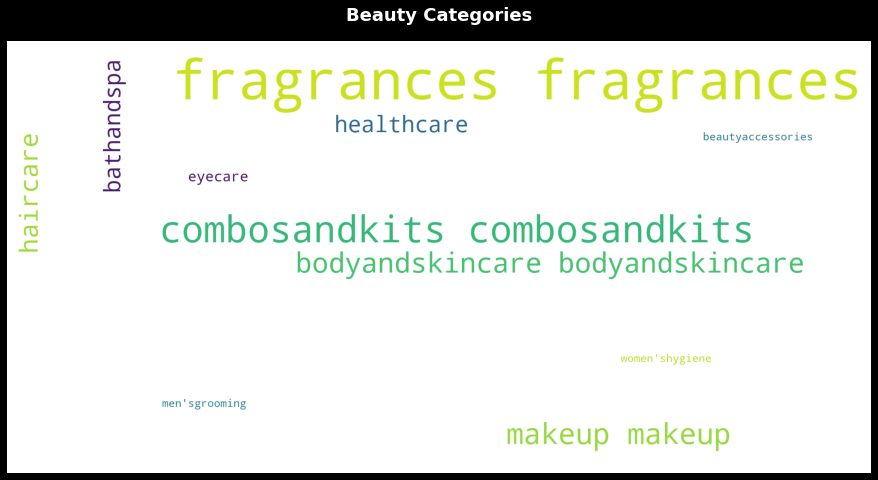

In [ ]:
plt.figure(figsize = (12, 6), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_6) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Beauty Categories", size=18, color='white',fontweight="bold", pad=20)

In [ ]:
df_Computers= data.loc[data['category']== 'Computers']

In [ ]:
df_Computers['category_1'].unique()

array(['NetworkComponents', 'TabletAccessories', 'LaptopAccessories',
       'Software', 'ComputerPeripherals', 'Storage', 'Laptops',
       'ComputerComponents'], dtype=object)

In [ ]:
comment_words_7 = '' 
for val in df_Computers['category_1']: 
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_7 += " ".join(tokens)+" "

wordcloud_7 = WordCloud(width = 2000, height = 1000,  background_color ='white', 
                stopwords = stopwords, min_font_size = 10).generate(comment_words_7)

Text(0.5, 1.0, 'Computers Categories')

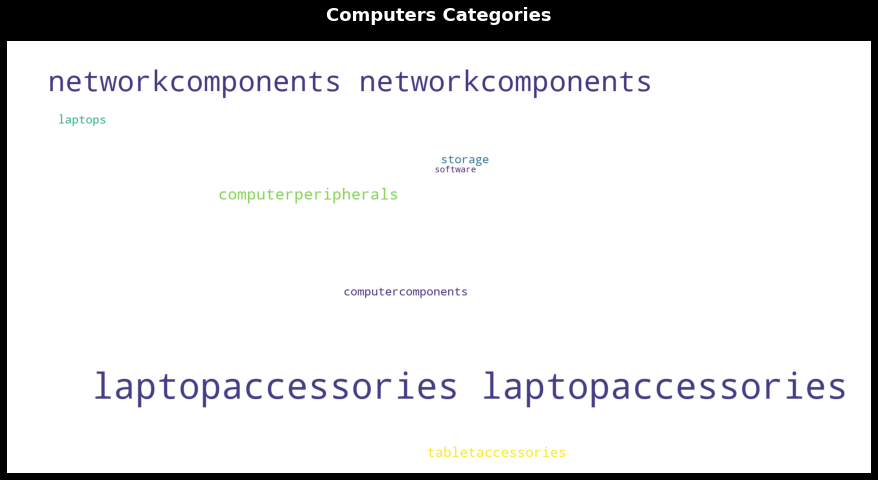

In [ ]:
plt.figure(figsize = (12, 6), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_7) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Computers Categories", size=18, color='white',fontweight="bold", pad=20)

**Filtering dataset**

In [ ]:
data.head(2)

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   

                                         description category  \
0  Key Features of Elegance Polyester Multicolor ...     Home   
1  Specifications of Sathiyas Cotton Bath Towel (...     Baby   

             category_1                                  description_clean  \
0  Curtains&Accessories  key features of elegance polyester multicolor ...   
1         BabyBath&Skin  specifications of sathiyas cotton bath towel  ...   

                                          name_clean  \
0  elegance polyester multicolor abstract eyelet ...   
1                         sathiyas cotton bath towel   

                               description_tokenized  \
0  [key, features, of, elegance, polyester, multi...   
1  [specifications, of, sathiyas, cotton, bath, t...   

                                      name_tokenized  \
0  [elegance, polyester, multicolor, abstract, ey...   
1                    [sathiyas, cotton, bath, towel]   

                                description_stopword  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   

                                       name_stopword  \
0  [elegance, polyester, multicolor, abstract, ey...   
1                    [sathiyas, cotton, bath, towel]   

                                   description_lemma  \
0  [key, feature, elegance, polyester, multicolor...   
1  [specification, sathiyas, cotton, bath, towel,...   

                                          name_lemma  \
0  [elegance, polyester, multicolor, abstract, ey...   
1                    [sathiyas, cotton, bath, towel]   

                             description_lemma_short  \
0  [key, feature, elegance, polyester, multicolor...   
1  [specification, sathiyas, cotton, bath, towel,...   

                                    name_lemma_short  
0  [elegance, polyester, multicolor, abstract, ey...  
1                    [sathiyas, cotton, bath, towel]

In [ ]:
text_data= data.filter(items=['image','product_name','category','category_1','description_lemma_short','name_lemma_short'])

**Removing** all the words which are repeated once! 

In [ ]:
print(len(df_word_freq['Frequency'].index[df_word_freq['Frequency']==1]),"words are repeated once")

2423 words are repeated once


In [ ]:
rem_list = list(df_word_freq['Frequency'].index[df_word_freq['Frequency']==1])
df_word_freq['words'][rem_list].values

array(['close', 'romantic', 'joyous', ..., 'final', 'film', 'polyvinyl'],
      dtype=object)

In [ ]:
# remove all the words which are repeated once
text_data['description_final_1'] = text_data['description_lemma_short'].apply(lambda x: [i for i in x if i not in df_word_freq['words'][rem_list].values])

In [ ]:
word_size(text_data,'description_final_1')

2026

**Analyse exploratoire apres suppression**

In [ ]:
stats, freq = dict(), dict()
for k, v in text_data['description_final_1'].iteritems():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)} 


freq_totale = nltk.Counter()
for k, v in text_data['description_final_1'].iteritems():
    freq_totale += freq[k]

In [ ]:
freq_totale.keys()

dict_keys(['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'height', 'pack', 'price', 'enhances', 'look', 'interior', 'made', 'high', 'quality', 'fabric', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'give', 'home', 'bright', 'appeal', 'design', 'attention', 'sure', 'heart', 'contemporary', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'sun', 'ray', 'want', 'wish', 'good', 'whole', 'world', 'evening', 'create', 'special', 'moment', 'beauty', 'given', 'soothing', 'print', 'bring', 'light', 'get', 'right', 'amount', 'sunlight', 'specification', 'general', 'brand', 'designed', 'type', 'model', 'name', 'set', 'color', 'dimension', 'length', 'box', 'number', 'content', 'sale', 'package', 'body', 'material', 'cotton', 'bath', 'towel', 'red', 'yellow', 'blue', 'machine', 'washable', 'yes', 'self', 'gsm', 'ideal', 'men', 'woman', 'b

In [ ]:
df=pd.DataFrame({'words':freq_totale.keys(),'Frequency':freq_totale.values()})

In [ ]:
df

words  Frequency
0             key        224
1         feature        404
2        elegance         11
3       polyester         68
4      multicolor        167
...           ...        ...
2020          gum         10
2021      residue         10
2022  suitablefor         11
2023        patta          2
2024     uberlyfe          4

[2025 rows x 2 columns]

Text(0.5, 1.0, 'word frequency after cleaning')

<Figure size 1440x720 with 0 Axes>

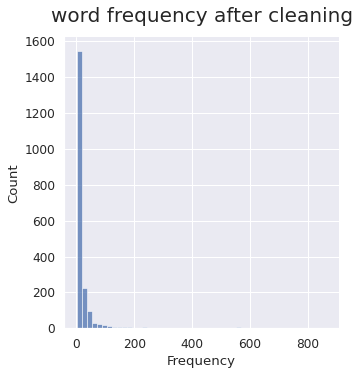

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(data=df,bins=50, x="Frequency");
plt.title('word frequency after cleaning', fontsize = 20, pad = 15)

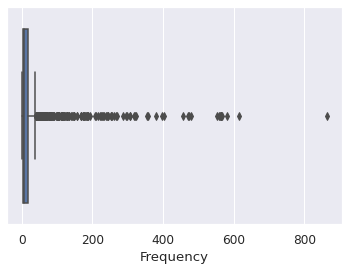

In [ ]:
sns.boxplot(data=df,x='Frequency');

In [ ]:
df['Frequency'].describe()

count    2025.000000
mean       23.848395
std        61.704008
min         2.000000
25%         4.000000
50%         7.000000
75%        18.000000
max       864.000000
Name: Frequency, dtype: float64

## **Bag of words**

The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text_data['description_final_1']

0       [key, feature, elegance, polyester, multicolor...
1       [specification, cotton, bath, towel, bath, tow...
2       [key, feature, cotton, terry, face, towel, set...
3       [key, feature, santosh, royal, fashion, cotton...
4       [key, feature, jaipur, print, cotton, floral, ...
                              ...                        
1045    [empower, extra, large, self, adhesive, sticke...
1046    [wallmantra, large, vinyl, sticker, sticker, p...
1047    [buy, uberlyfe, extra, large, pigmented, impor...
1048    [buy, wallmantra, medium, vinyl, sticker, stic...
1049    [buy, uberlyfe, large, vinyl, sticker, online,...
Name: description_final_1, Length: 1050, dtype: object

In [ ]:
corpus=text_data['description_final_1'].apply(lambda x: ','.join(x))
corpus

0       key,feature,elegance,polyester,multicolor,abst...
1       specification,cotton,bath,towel,bath,towel,red...
2       key,feature,cotton,terry,face,towel,set,size,s...
3       key,feature,santosh,royal,fashion,cotton,print...
4       key,feature,jaipur,print,cotton,floral,king,si...
                              ...                        
1045    empower,extra,large,self,adhesive,sticker,pack...
1046    wallmantra,large,vinyl,sticker,sticker,pack,pr...
1047    buy,uberlyfe,extra,large,pigmented,imported,st...
1048    buy,wallmantra,medium,vinyl,sticker,sticker,on...
1049    buy,uberlyfe,large,vinyl,sticker,online,uberly...
Name: description_final_1, Length: 1050, dtype: object

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,1),analyzer = "word")
X = vectorizer.fit_transform(corpus)

In [ ]:
features_names=vectorizer.get_feature_names()
dense=X.todense()
#denselist=dense.tolist()
#comptage_mots=pd.DataFrame(denselist,columns=features_names)
comptage_mots=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
comptage_mots.head(3)

aapno  ability  able  abode  absorbency  absorbent  abstract  accent  \
0      0        0     0      0           0          0         4       0   
1      0        0     0      0           0          0         0       0   
2      0        0     0      0           1          0         0       0   

   access  accessory  accident  accidental  according  across  act  actual  \
0       0          0         0           0          0       0    0       0   
1       0          0         0           0          0       0    0       0   
2       0          0         0           0          0       0    0       0   

   adapter  adaptor  add  addition  additional  adhesive  adidas  adjustable  \
0        0        0    0         0           0         0       0           0   
1        0        0    0         0           0         0       0           0   
2        0        0    0         0           0         0       0           0   

   admired  adorable  adorn  adsl  advice  aero  affect  affordable  age  aid  \
0        0         0      0     0       0     0       0           0    0    0   
1        0         0      0     0       0     0       0           0    0    0   
2        0         0      0     0       0     0       0           0    0    0   

   air  akup  alarm  alfajr  aline  allin  allow  allowed  allowing  allows  \
0    0     0      0       0      0      0      0        0         0       0   
1    0     0      0       0      0      0      0        0         0       0   
2    0     0      0       0      0      0      0        0         0       0   

   alloy  alluring  almond  aloevera  along  also  alternative  aluminium  \
0      0         0       0         0      0     0            0          0   
1      0         0       0         0      0     0            0          0   
2      0         0       0         0      0     0            0          0   

   always  amazed  amazing  ambience  amount  analog  analogdigital  andre  \
0       0       0        0         0       1       0              0      0   
1       0       0        0         0       0       0              0      0   
2       0       0        0         0       0       0              0      0   

   android  angel  animal  anna  anodised  another  ant  anti  antiaging  \
0        0      0       0     0         0        0    1     1          0   
1        0      0       0     0         0        0    0     0          0   
2        0      0       0     0         0        0    0     0          0   

   antibacterial  antidepressant  antique  antiqueshop  antiseptic  anymore  \
0              0               0        0            0           0        0   
1              0               0        0            0           0        0   
2              0               0        0            0           0        0   

   anywhere  apart  app  apparel  appeal  appealing  appearance  appears  \
0         0      1    0        0       1          0           0        0   
1         0      0    0        0       0          0           0        0   
2         0      0    0        0       0          0           0        0   

   apple  application  applied  apply  approach  approx  arabian  arb  \
0      0            0        0      0         0       0        0    0   
1      0            0        0      0         0       0        0    0   
2      0            0        0      0         0       0        0    0   

   archies  area  aroma  around  art  artifact  artificial  artisan  artist  \
0        0     0      0       0    0         0           0        0       0   
1        0     0      0       0    0         0           0        0       0   
2        0     0      0       0    0         0           0        0       0   

   artistic  artpiece  artwork  asia  aspect  assembled  assembly  assorted  \
0         0         0        0     0       0          0         0         0   
1         0         0        0     0       0          0         0         0   
2         0         0        0

In [ ]:
comptage_mots.shape

(1050, 2025)

In [ ]:
df=pd.DataFrame({'Word frequancy': comptage_mots.max().sort_values(ascending=False).index,'Total':comptage_mots.max().sort_values(ascending=False).values})

In [ ]:
df

Word frequancy  Total
0            laptop     21
1           product     21
2              bowl     21
3           blanket     19
4              skin     18
...             ...    ...
2020      floralina      1
2021       midiknee      1
2022           mild      1
2023         milton      1
2024          zyxel      1

[2025 rows x 2 columns]

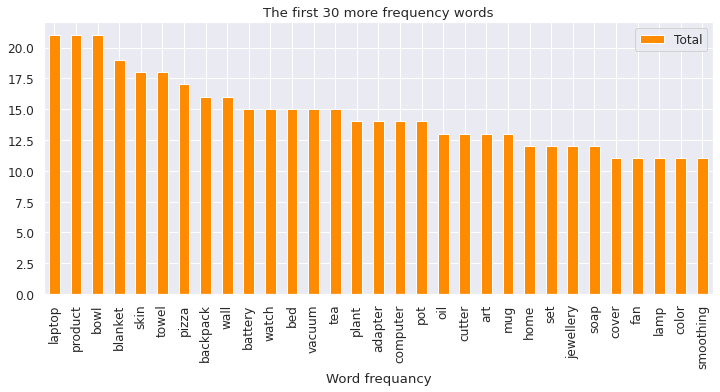

In [ ]:

df1=df.loc[0:30,['Word frequancy','Total']]

df1.plot(kind='bar',x='Word frequancy',y='Total', color="darkorange",title='The first 30 more frequency words',figsize=(12,5))


### **TF IDF**
Term frequency-inverse document frequency

Text vectorization algorithm namely TF-IDF vectorizer, which is a very popular approach for traditional machine learning algorithms can help in transforming text into vectors.
tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification. One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# unigrams
vect=TfidfVectorizer (analyzer='word', stop_words= 'english',ngram_range=(1,1))
tfidf_mat_1=vect.fit_transform(corpus)

In [ ]:
features_names=vect.get_feature_names()
dense=tfidf_mat_1.todense()
denselist=dense.tolist()
words_freq_1=pd.DataFrame(denselist,columns=features_names)
words_freq_1.head(3)

aapno  ability  able  abode  absorbency  absorbent  abstract  accent  \
0    0.0      0.0   0.0    0.0    0.000000        0.0  0.178226     0.0   
1    0.0      0.0   0.0    0.0    0.000000        0.0  0.000000     0.0   
2    0.0      0.0   0.0    0.0    0.075584        0.0  0.000000     0.0   

   access  accessory  accident  accidental  according  act  actual  adapter  \
0     0.0        0.0       0.0         0.0        0.0  0.0     0.0      0.0   
1     0.0        0.0       0.0         0.0        0.0  0.0     0.0      0.0   
2     0.0        0.0       0.0         0.0        0.0  0.0     0.0      0.0   

   adaptor  add  addition  additional  adhesive  adidas  adjustable  admired  \
0      0.0  0.0       0.0         0.0       0.0     0.0         0.0      0.0   
1      0.0  0.0       0.0         0.0       0.0     0.0         0.0      0.0   
2      0.0  0.0       0.0         0.0       0.0     0.0         0.0      0.0   

   adorable  adorn  adsl  advice  aero  affect  affordable  age  aid  air  \
0       0.0    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   
1       0.0    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   
2       0.0    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   

   akup  alarm  alfajr  aline  allin  allow  allowed  allowing  allows  alloy  \
0   0.0    0.0     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0   
1   0.0    0.0     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0   
2   0.0    0.0     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0   

   alluring  almond  aloevera  alternative  aluminium  amazed  amazing  \
0       0.0     0.0       0.0          0.0        0.0     0.0      0.0   
1       0.0     0.0       0.0          0.0        0.0     0.0      0.0   
2       0.0     0.0       0.0          0.0        0.0     0.0      0.0   

   ambience  analog  analogdigital  andre  android  angel  animal  anna  \
0       0.0     0.0            0.0    0.0      0.0    0.0     0.0   0.0   
1       0.0     0.0            0.0    0.0      0.0    0.0     0.0   0.0   
2       0.0     0.0            0.0    0.0      0.0    0.0     0.0   0.0   

   anodised       ant      anti  antiaging  antibacterial  antidepressant  \
0       0.0  0.070537  0.068142        0.0            0.0             0.0   
1       0.0  0.000000  0.000000        0.0            0.0             0.0   
2       0.0  0.000000  0.000000        0.0            0.0             0.0   

   antique  antiqueshop  antiseptic  anymore     apart  app  apparel  \
0      0.0          0.0         0.0      0.0  0.073626  0.0      0.0   
1      0.0          0.0         0.0      0.0  0.000000  0.0      0.0   
2      0.0          0.0         0.0      0.0  0.000000  0.0      0.0   

     appeal  appealing  appearance  appears  apple  application  applied  \
0  0.063097        0.0         0.0      0.0    0.0          0.0      0.0   
1  0.000000        0.0         0.0      0.0    0.0          0.0      0.0   
2  0.000000        0.0         0.0      0.0    0.0          0.0      0.0   

   apply  approach  approx  arabian  arb  archies  area  aroma  art  artifact  \
0    0.0       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   
1    0.0       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   
2    0.0       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   

   artificial  artisan  artist  artistic  artpiece  artwork  asia  aspect  \
0         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   
1         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   
2         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   

   assembled  assembly  assorted  assure  assured  astringent  asus  \
0        0.0       0.0  0.000000     0.0      0.0         0.0   0.0   
1        0.0       0.0  0.000000     0.0      0.0         0.0   0.0   
2        0.0       0.0  0.203836     0.0      0.0         0.0   0.0   

   attenti

In [ ]:
words_freq_1.shape 

(1050, 1943)

In [ ]:
# unigrams and bigrams
vect=TfidfVectorizer (analyzer='word', stop_words= 'english',ngram_range=(1,2))
tfidf_mat_2=vect.fit_transform(corpus)

In [ ]:
features_names=vect.get_feature_names()
dense=tfidf_mat_2.todense()
denselist=dense.tolist()
words_freq_2=pd.DataFrame(denselist,columns=features_names)
words_freq_2.head(3)

aapno  aapno rajasthan  ability  ability aid  ability lightweight  able  \
0    0.0              0.0      0.0          0.0                  0.0   0.0   
1    0.0              0.0      0.0          0.0                  0.0   0.0   
2    0.0              0.0      0.0          0.0                  0.0   0.0   

   able light  able present  abode  abode add  abode order  absorbency  \
0         0.0           0.0    0.0        0.0          0.0     0.00000   
1         0.0           0.0    0.0        0.0          0.0     0.00000   
2         0.0           0.0    0.0        0.0          0.0     0.04941   

   absorbency softness  absorbency towel  absorbent  absorbent blanket  \
0             0.000000               0.0        0.0                0.0   
1             0.000000               0.0        0.0                0.0   
2             0.052331               0.0        0.0                0.0   

   absorbent high  absorbent machine  absorbent quick  absorbent yes  \
0             0.0                0.0              0.0            0.0   
1             0.0                0.0              0.0            0.0   
2             0.0                0.0              0.0            0.0   

   abstract  abstract abstract  abstract art  abstract ceramic  \
0   0.13084                0.0           0.0               0.0   
1   0.00000                0.0           0.0               0.0   
2   0.00000                0.0           0.0               0.0   

   abstract checkered  abstract color  abstract cushion  abstract design  \
0                 0.0             0.0               0.0              0.0   
1                 0.0             0.0               0.0              0.0   
2                 0.0             0.0               0.0              0.0   

   abstract double  abstract eyelet  abstract floral  abstract geometric  \
0              0.0         0.162151              0.0                 0.0   
1              0.0         0.000000              0.0                 0.0   
2              0.0         0.000000              0.0                 0.0   

   abstract painting  abstract polyester  abstract single  abstract style  \
0                0.0            0.057245              0.0             0.0   
1                0.0            0.000000              0.0             0.0   
2                0.0            0.000000              0.0             0.0   

   accent  accent flexible  accent room  access  access pocket  access store  \
0     0.0              0.0          0.0     0.0            0.0           0.0   
1     0.0              0.0          0.0     0.0            0.0           0.0   
2     0.0              0.0          0.0     0.0            0.0           0.0   

   accessory  accessory artifact  accessory artificial  accessory battery  \
0        0.0                 0.0                   0.0                0.0   
1        0.0                 0.0                   0.0                0.0   
2        0.0                 0.0                   0.0                0.0   

   accessory box  accessory clip  accessory come  accessory component  \
0            0.0             0.0             0.0                  0.0   
1            0.0             0.0             0.0                  0.0   
2            0.0             0.0             0.0                  0.0   

   accessory feature  accessory filled  accessory gift  accessory like  \
0                0.0               0.0             0.0             0.0   
1                0.0               0.0             0.0             0.0   
2                0.0               0.0             0.0             0.0   

   accessory ready  accessory style  accessory used  accessory wall  \
0              0.0              0.0             0.0             0.0   
1              0.0              0.0             0.0             0.0   
2              0.0              0.0             0.0             0.0   

   accessory water  accident  accident customer  accident water  accidental  \
0              0.0       0.0           

In [ ]:
words_freq_2.shape

(1050, 15327)

In [ ]:
vect=TfidfVectorizer (analyzer='word', stop_words= 'english',ngram_range=(1,2), max_df=0.65, min_df=5)
tfidf_mat_3=vect.fit_transform(corpus)

In [ ]:
features_names=vect.get_feature_names()
dense=tfidf_mat_3.todense()
denselist=dense.tolist()
words_freq_3=pd.DataFrame(denselist,columns=features_names)
words_freq_3.shape

(1050, 1955)

In [ ]:
df=pd.DataFrame({'word_freq': words_freq_1.max().sort_values(ascending=False).index,'Total':words_freq_1.max().sort_values(ascending=False).values})


In [ ]:
df

word_freq     Total
0         shadow  0.934044
1         cooker  0.907424
2           true  0.900339
3         kadhai  0.835107
4            cow  0.831092
...          ...       ...
1938  compliance  0.044737
1939   deviation  0.044737
1940  requirment  0.044737
1941      assure  0.044737
1942    volatege  0.044737

[1943 rows x 2 columns]

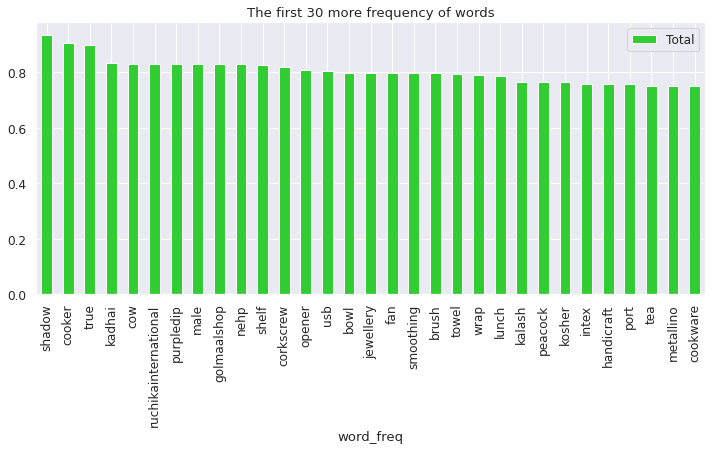

In [ ]:
df1=df.loc[0:30,['word_freq','Total']]#les 20mots les plus frequents 
df1.plot(kind='bar',x='word_freq',y='Total', color="limegreen",title='The first 30 more frequency of words',figsize=(12,5))

In [ ]:
words_freq_1.describe()

aapno      ability         able        abode   absorbency  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001325     0.000313     0.000762     0.000383     0.000191   
std       0.025019     0.008419     0.012347     0.008964     0.004518   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.540935     0.265486     0.205913     0.242478     0.125438   

         absorbent     abstract       accent       access    accessory  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001129     0.011520     0.000372     0.000146     0.001855   
std       0.019162     0.062111     0.008695     0.003750     0.017459   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.444728     0.619200     0.234156     0.115539     0.346999   

          accident   accidental    according          act       actual  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.000126     0.000133     0.000223     0.000352     0.001258   
std       0.002900     0.003355     0.004323     0.007628     0.012267   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.072510     0.102003     0.103776     0.224335     0.273480   

           adapter      adaptor          add     addition   additional  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.005827     0.001157     0.003931     0.000759     0.005618   
std       0.050388     0.021129     0.022903     0.010040     0.021330   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.617882     0.566767     0.226397     0.206120     0.191327   

          adhesive       adidas   adjustable      admired     adorable  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001092     0.002149     0.000939     0.000250     0.002259   
std       0.019651     0.031906     0.012866     0.006157     0.019098   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.375173     0.647084     0.260574     0.182865     0.170988   

             adorn         adsl       advice         aero       affect  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.000787     0.000935     0.000195     0.001304     0.000210   
std       0.013281     0.021424     0.003702     0.024387     0.004817   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.269760     0.510152     0.084792     0.466455     0.110476   

        aff

In [ ]:
df_total_1 = pd.concat([text_data, words_freq_1], axis=1)
df_total_1.head(2)

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   

                                        product_name  category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...      Home   
1                         Sathiyas Cotton Bath Towel      Baby   

             category_1                            description_lemma_short  \
0  Curtains&Accessories  [key, feature, elegance, polyester, multicolor...   
1         BabyBath&Skin  [specification, sathiyas, cotton, bath, towel,...   

                                    name_lemma_short  \
0  [elegance, polyester, multicolor, abstract, ey...   
1                    [sathiyas, cotton, bath, towel]   

                               descrip_with_once_rep  \
0  [key, feature, elegance, polyester, multicolor...   
1  [specification, sathiyas, cotton, bath, towel,...   

                            descrip_without_once_rep  \
0  [key, feature, elegance, polyester, multicolor...   
1  [specification, cotton, bath, towel, bath, tow...   

                                 description_final_1  aapno  ability  able  \
0  [key, feature, elegance, polyester, multicolor...    0.0      0.0   0.0   
1  [specification, cotton, bath, towel, bath, tow...    0.0      0.0   0.0   

   abode  absorbency  absorbent  abstract  accent  access  accessory  \
0    0.0         0.0        0.0  0.178226     0.0     0.0        0.0   
1    0.0         0.0        0.0  0.000000     0.0     0.0        0.0   

   accident  accidental  according  act  actual  adapter  adaptor  add  \
0       0.0         0.0        0.0  0.0     0.0      0.0      0.0  0.0   
1       0.0         0.0        0.0  0.0     0.0      0.0      0.0  0.0   

   addition  additional  adhesive  adidas  adjustable  admired  adorable  \
0       0.0         0.0       0.0     0.0         0.0      0.0       0.0   
1       0.0         0.0       0.0     0.0         0.0      0.0       0.0   

   adorn  adsl  advice  aero  affect  affordable  age  aid  air  akup  alarm  \
0    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   0.0    0.0   
1    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   0.0    0.0   

   alfajr  aline  allin  allow  allowed  allowing  allows  alloy  alluring  \
0     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0       0.0   
1     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0       0.0   

   almond  aloevera  alternative  aluminium  amazed  amazing  ambience  \
0     0.0       0.0          0.0        0.0     0.0      0.0       0.0   
1     0.0       0.0          0.0        0.0     0.0      0.0       0.0   

   analog  analogdigital  andre  android  angel  animal  anna  anodised  \
0     0.0            0.0    0.0      0.0    0.0     0.0   0.0       0.0   
1     0.0            0.0    0.0      0.0    0.0     0.0   0.0       0.0   

        ant      anti  antiaging  antibacterial  antidepressant  antique  \
0  0.070537  0.068142        0.0            0.0             0.0      0.0   
1  0.000000  0.000000        0.0            0.0             0.0      0.0   

   antiqueshop  antiseptic  anymore     apart  app  apparel    appeal  \
0          0.0         0.0      0.0  0.073626  0.0      0.0  0.063097   
1          0.0         0.0      0.0  0.000000  0.0      0.0  0.000000   

   appealing  appearance  appears  apple  application  applied  apply  \
0        0.0         0.0      0.0    0.0          0.0      0.0    0.0   
1        0.0         0.0      0.0    0.0          0.0      0.0    0.0   

   approach  approx  arabian  arb  archies  area  aroma  art  artifact  \
0       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   
1       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   

   artificial  artisan  artist  artistic  artpiece  artwork  asia  aspect  \
0         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   
1         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   

   assembl

Making a **new file**

In [ ]:
# All the data in TFIDF with image & product_category 'df_tfidfvect_total'

from google.colab import drive
drive.mount('/content/drive')
df_total_1.to_csv('df_total_1.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# all words after TFIDF 'words_freq' unigram
from google.colab import drive
drive.mount('/content/drive')
words_freq_1.to_csv('words_freq_1.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# all words after TFIDF 'words_freq' bigram et unigram
from google.colab import drive
drive.mount('/content/drive')
words_freq_3.to_csv('words_freq_3.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# our first dataset after cleaning 'text_data'
"""text_data= data.filter(items=['image','product_name','category','category_1','description_lemma_short','name_lemma_short'])"""

from google.colab import drive
drive.mount('/content/drive')
text_data.to_csv('text_data.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\Drive/p6
!ls

text_data = pd.read_csv('/content/drive/MyDrive/p6/text_data.csv')

/content/drive/MyDrive/p6
'Classifier automatiquement des biens de consommation.ipynb'   image
 clustering_model_kmeans_description.sav		       new_df.csv
 df_tfidfvect.csv					       results.txt
 df_tfidfvect_total.csv					       text_data.csv
 df_total_1.csv						       words_freq_1.csv
 df_untokenize_description.csv				       words_freq_3.csv
 flipkart_com-ecommerce_sample_1050.csv			       words_freq.csv


In [ ]:
text_data.describe()

image  \
count                                   1050   
unique                                  1050   
top     e7cab08a267e815c72a26513222783e0.jpg   
freq                                       1   

                                             product_name category  \
count                                                1050     1050   
unique                                               1050        7   
top     Wild Ferns Lanolin Eye Creme with Collagen, Vi...  Kitchen   
freq                                                    1      150   

          category_1                            description_lemma_short  \
count           1050                                               1050   
unique            63                                                983   
top     WristWatches  ['printland', 'ceramic', 'mug', 'price', 'prin...   
freq             149                                                 12   

                       name_lemma_short  \
count                              1050   
unique                              949   
top     ['printland', 'ceramic', 'mug']   
freq                                 13   

                                    descrip_with_once_rep  \
count                                                1050   
unique                                                983   
top     ['printland', 'ceramic', 'mug', 'price', 'prin...   
freq                                                   12   

                                 descrip_without_once_rep  \
count                                                1050   
unique                                                938   
top     ['printland', 'ceramic', 'mug', 'price', 'prin...   
freq                                                   12   

                                      description_final_1  
count                                                1050  
unique                                                938  
top     ['printland', 'ceramic', 'mug', 'price', 'prin...  
freq                                                   12

### **Dimentional reduction**

In [ ]:
from sklearn import decomposition

def pca_(X, X_name='Dataset X', cls='Catégories', gr_colors=df['cat_0_colv'], df_gr_unique=df_cat_0_unique):
    
    n_c = 100
    
    # Transformation ACP
    pca = decomposition.PCA(n_components=n_c, random_state=rs_)
    X_pca = pca.fit_transform(X)
    var_cum = pca.explained_variance_ratio_.cumsum().max()
    print('Nombre de dimensions:',n_c)
    print('Variances expliquées cumulées:', round(var_cum,2))

    # Figure
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(121)
    ax.scatter(X_pca[:,0], X_pca[:,1], c=gr_colors ,s=10)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    
    # Construction de la légende
    df_gr_unique.columns = ['gr_id','gr','gr_colv']    
    list_legend = []
    for i in df_gr_unique['gr_id']:
        list_legend.append(mpatches.Patch(color = df_gr_unique['gr_colv'][i], label = df_gr_unique['gr'][i]))
    plt.legend(handles=list_legend)
    plt.title(X_name+' - Réduction de dimensions ACP - Classes '+cls)
    plt.show()

In [ ]:
#define vectorizer parameters
from sklearn.feature_extraction.text import CountVectorizer

def BOW_TF(X,n_gram):
    tfidf_vectorizer = TfidfVectorizer(
        min_df=2,
        max_df=0.9,
        max_features=5000,
        ngram_range=n_gram)
    

    # Generate matrix of word vectors
    # tf-idf (term frequency-inverse document frequency)
    tfidf_matrix = tfidf_vectorizer.fit_transform(X)
    tfidf_words = tfidf_vectorizer.get_feature_names()

    return tfidf_matrix


def BOW_Vec(X, n_gram):
  tf_vectorizer=CountVectorizer(
      min_df=2,
      max_df=0.9,
      max_features=5000,
      ngram_range=n_gram)
  
         
      # bag of words (term frequency)
  tf_matrix= tf_vectorizer.fit_transform(X)
  tf_words = tf_vectorizer.get_feature_names()
  return tf_matrix

In [ ]:
"""text_data['concat']=text_data['description_final_1']+' '+text_data['name_lemma_short']
X1 = text_data['description_final_1'].copy()
X2=text_data['name_lemma_short'].copy()"""


vec_matrix_D_1=BOW_Vec(text_data['description_final_1'].copy(),n_gram=(1,1))
vec_matrix_D_2=BOW_Vec(text_data['description_final_1'].copy(),n_gram=(1,2))

tf_matrix_D_1=BOW_TF(text_data['description_final_1'].copy(),n_gram=(1,1))
tf_matrix_D_2=BOW_TF(text_data['description_final_1'].copy(),n_gram=(1,2))

In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 36.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=52b3329444e0f4e841cb9768fac15903416f48d153b67d71f971619ec6fc1628
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=8d93351a059dd7b2a5cff97b6bc535f8b052f477a35399e95771d6a7c9c4e35e
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
from sklearn.decomposition import SparsePCA
from umap import UMAP
from sklearn.manifold import TSNE

def plot_tsne_pca(matrix,title,labels):

# Dimensionality reduction using PCA,
     # reduce the tfidf matrix to just 2 features

    pca = PCA(n_components=2, random_state=5).fit_transform(matrix)
    tsne_pca = TSNE().fit_transform(PCA(n_components=3).fit_transform(matrix))
    tsne = TSNE(n_components=2, random_state=5).fit_transform(matrix)   

    #attaching the label to each 2D projection
    pca_data=np.vstack((pca.T,labels)).T
    pca_df=pd.DataFrame(pca_data, columns=['pca-one','pca-two','category'])

    tsne_data=np.vstack((tsne.T,labels)).T
    tsne_df=pd.DataFrame(tsne_data, columns=['tsne-one','tsne-two','category'])
    
    
    idx = np.random.choice(range(pca.shape[0]), size=500, replace=False)
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.scatterplot(data=pca_df, x="pca-one", y="pca-two",
                    hue='category', ax=ax[0])
    
    ax[0].set_title('PCA Cluster Plot'+' '+title)

    sns.scatterplot(data=tsne_df, x="tsne-one", y="tsne-two",
                    hue='category', ax=ax[1])
    
    ax[1].set_title('TSNE Cluster Plot'+' '+title)

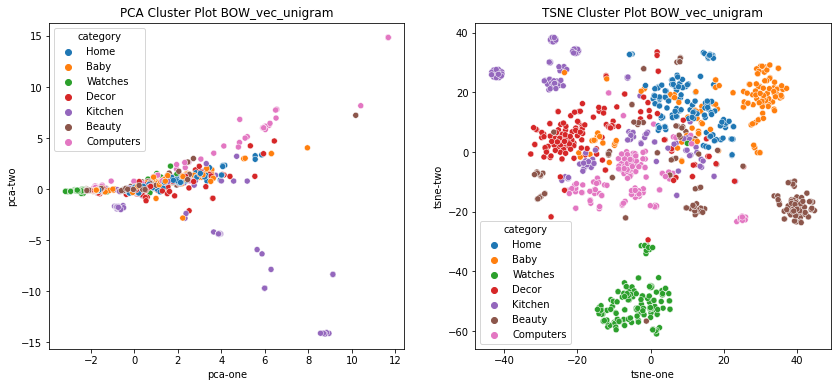

In [ ]:
plot_tsne_pca(vec_matrix_D_1.todense(),'BOW_vec for description unigram',text_data['category'])

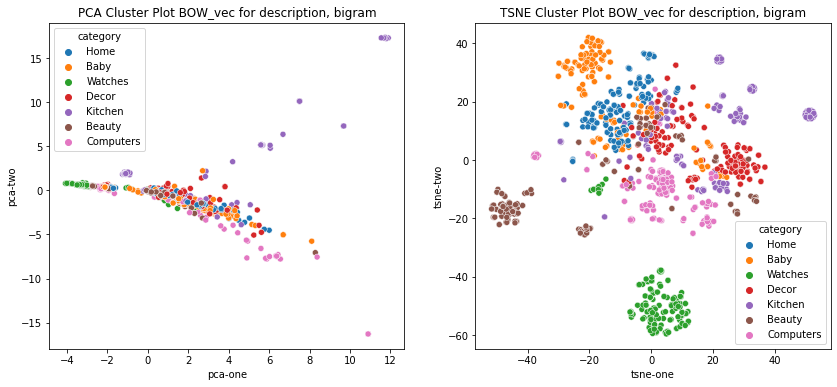

In [ ]:
plot_tsne_pca(vec_matrix_D_2.todense(),'BOW_vec for description, bigram',text_data['category'])

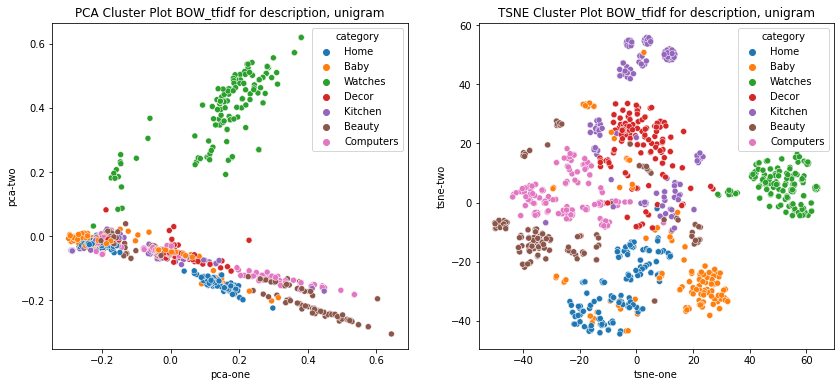

In [ ]:
plot_tsne_pca(tf_matrix_D_2.todense(),'BOW_tfidf for description, unigram',text_data['category'])

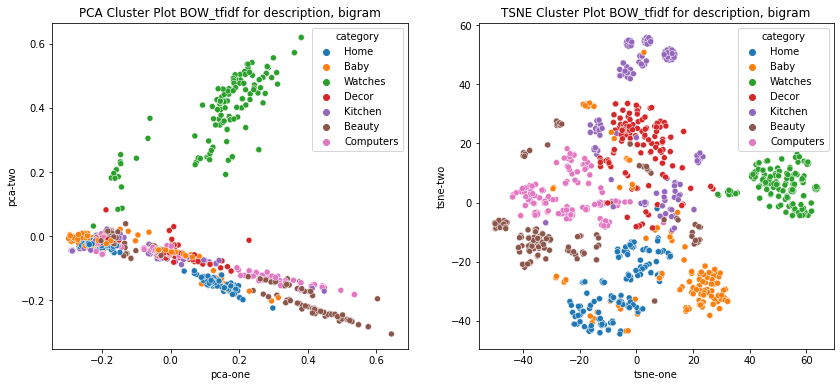

In [ ]:
plot_tsne_pca(tf_matrix_D_2.todense(),'BOW_tfidf for description, bigram',text_data['category'])

## **Classification**

### **KMean**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k=7#nbr of cluster
def kmeans_clustering(tfidf_matrix,tf_matrix,X_emb,k):

    nmf = NMF(n_components=k)
    nmf_matrix = nmf.fit_transform(tfidf_matrix)


    lda = LatentDirichletAllocation(k, learning_method='batch')
    lda_tf = lda.fit_transform(tf_matrix)

    # Singular Value Decomposition
    lsa = TruncatedSVD(n_components=100)

    matrix1=tfidf_matrix.copy()
    matrix2=tf_matrix.copy()

    lsa_tfidf = lsa.fit_transform(matrix1)
    lsa_tf = lsa.fit_transform(matrix2)
    # initialize standardscaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer,MinMaxScaler

    SS = Normalizer()

        # transform my reducer data using standardscaler

    #tfidf=SS.fit_transform(X)
    #tf=SS.fit_transform(Y)
    #lsa_tfidf_std = SS.fit_transform(lsa_matrix_tfidf)
    #lsa_tf_std = SS.fit_transform(lsa_matrix_tf)
    #nmf_tfidf_std = SS.fit_transform(nmf_matrix)
    #lda_tf_std = SS.fit_transform(lda_matrix)
    #X_emb_std=SS.fit_transform(X_emb)
    km_tfidf = KMeans(n_clusters = k,init = 'random'
                          , n_init = 50, random_state = 20
                          , algorithm = 'full').fit(tfidf_matrix) 
    km_tf = KMeans(n_clusters = k,init = 'random'
                          , n_init = 50, random_state = 20
                          , algorithm = 'full').fit(tf_matrix)
    km_nmf =KMeans(n_clusters = k,init = 'random'
                          , n_init = 50, random_state = 20
                          , algorithm = 'full').fit(nmf_matrix)    
    km_lsa_tf = KMeans(n_clusters = k,init = 'random'
                          , n_init = 50, random_state = 20
                          , algorithm = 'full').fit(lsa_tfidf)# LSA-based k-means 
    km_lsa_tfidf = KMeans(n_clusters = k,init = 'random'
                          , n_init = 50, random_state = 20
                          , algorithm = 'full').fit(lsa_tf) 
    km_lda = KMeans(n_clusters = k,init = 'random'
                          , n_init = 50, random_state = 20
                          , algorithm = 'full').fit(lda_tf)       
    km_emb = KMeans(n_clusters = k,init = 'random'
                          , n_init = 50, random_state = 20
                          , algorithm = 'full').fit(X_emb)   # embr based k-means   

    return nmf_matrix,lda_tf,km_tfidf,km_tf,km_nmf,km_lsa_tf,km_lsa_tfidf,km_lda,km_emb

In [ ]:
import pickle

In [ ]:
km = KMeans(n_clusters=7,
            random_state=10,
            init='k-means++')
model = km.fit(X_pca)

# save the model to disk
filename = 'clustering_model_kmeans_description.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
label = km.fit_predict(X_pca)

In [ ]:
mylist = model.labels_
mylist = list(set(mylist))
mylist

[0, 1, 2, 3, 4, 5, 6]

### crawl_timestamp

In [ ]:
data_con.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [ ]:
data_con['crawl_timestamp']

0       2016-04-30 03:22:56 +0000
1       2016-04-30 03:22:56 +0000
2       2016-04-30 03:22:56 +0000
3       2016-06-20 08:49:52 +0000
4       2016-06-20 08:49:52 +0000
                  ...            
1045    2015-12-01 10:15:43 +0000
1046    2015-12-01 10:15:43 +0000
1047    2015-12-01 10:15:43 +0000
1048    2015-12-01 10:15:43 +0000
1049    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 1050, dtype: object

In [ ]:
data_con['crawl_timestamp'] = data_con['crawl_timestamp'].astype('datetime64')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

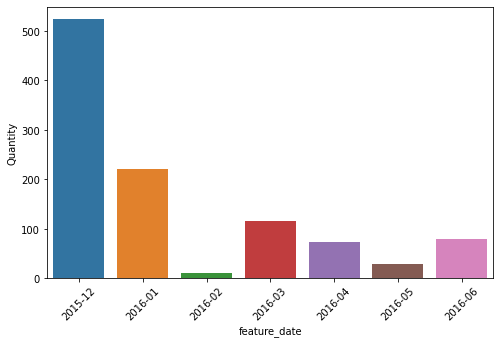

In [ ]:
df_tmp = pd.DataFrame(pd.DatetimeIndex(data_con['crawl_timestamp']).to_period('M'))
tmp = df_tmp['crawl_timestamp'].value_counts()

df_tmp = pd.DataFrame({ 'feature_date': tmp.index, 'Quantity': tmp.values })
df_tmp = df_tmp.sort_values(by='feature_date')

fig, ax = plt.subplots(figsize=(8, 5))
sns.set_color_codes("pastel")

s = sns.barplot(ax=ax,
                    x='feature_date',
                    y='Quantity',
                    data=df_tmp)
plt.xticks(rotation=45)

In [ ]:
df_tmp

feature_date  Quantity
0      2015-12       523
1      2016-01       220
6      2016-02        10
2      2016-03       115
4      2016-04        74
5      2016-05        29
3      2016-06        79

**POS tagging** is a task of labelling each word in a sentence with its appropriate part of speech. We already know that parts of speech include nouns, verb, adverbs, adjectives, pronouns, conjunction and their sub-categories.

In [ ]:
from collections import Counter
import nltk

tags = nltk.pos_tag(tokenization)
counts = Counter( tag for word,  tag in tags)
print(counts)

TypeError: ignored

### **Bigram** frequency

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

https://www.kaggle.com/vpkprasanna/basic-text-cleaning-wordcloud-and-n-gram-analysis

In [ ]:
def baigram_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
bigram = baigram_clean(''.join(str(data['description_lemma'].tolist())))

In [ ]:
description_bigrams_series = (pd.Series(nltk.ngrams(bigram, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

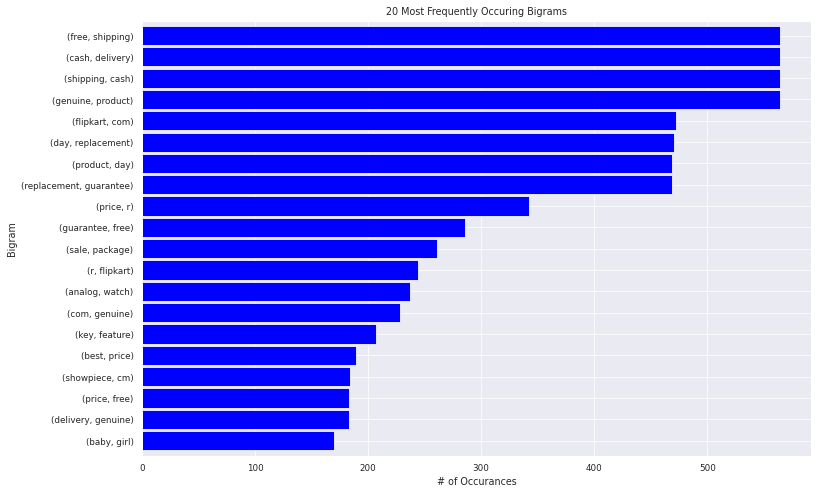

In [ ]:
description_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [ ]:
description_bigrams_series

(free, shipping)            564
(cash, delivery)            564
(shipping, cash)            564
(genuine, product)          564
(flipkart, com)             472
(day, replacement)          471
(product, day)              469
(replacement, guarantee)    469
(price, r)                  342
(guarantee, free)           286
(sale, package)             261
(r, flipkart)               244
(analog, watch)             237
(com, genuine)              228
(key, feature)              207
(best, price)               189
(showpiece, cm)             184
(delivery, genuine)         183
(price, free)               183
(baby, girl)                170
dtype: int64

### **Word2vec**

Each word's **TF-IDF** relevance is a normalized data format that also adds up to one. ... The main difference is that **Word2vec** produces one vector per word, whereas BoW produces one number (a wordcount). Word2vec is great for digging into documents and identifying content and subsets of content.